In [13]:
import numpy as np
import matplotlib.pyplot as plt


x_min = -15.0
x_max = 15.0
N = 500


# Create the grid
x = np.linspace(x_min, x_max, N)
dx = x[1] - x[0]


# Define the physical parameters
mass = 1.0
h_bar = 1.0
omega = 1


def qr_decomposition(matrix):
    Q, R = np.linalg.qr(matrix)
    return Q, R


def power_method(hamiltonian, num_iterations, initial_guess):
    #n = matrix.shape[0]

    #Set guess
    v = initial_guess

    for _ in range(num_iterations):
        #Multiply the Hamiltonian by the current vector
        prod = np.dot(hamiltonian, v)
        prodnorm = np.linalg.norm(prod)
        v = prod / prodnorm
        
        Q, R = qr_decomposition(hamiltonian)
        hamiltonian = np.dot(R, Q)
    #Normalize the final eigenvector
    #v /= np.linalg.norm(prod)
    #v /= np.linalg.norm(v)
    return v


def construct_hamiltonian(N, x, dx, h_bar, mass, omega):
    potential = 0.5 * mass * omega**2 * x**2
    potential = np.diag(potential)
    
    hamiltonian = np.zeros((N, N))
    
    finite_diff = -2 * np.eye(N)
    finite_diff += np.eye(N, k=1)
    finite_diff += np.eye(N, k=-1)
    
    kinetic = -h_bar**2 / (2 * mass * dx**2) * finite_diff
    
    hamiltonian = kinetic + potential*np.eye(N)
    print(hamiltonian)
    return hamiltonian


def eigensystem_solver(num_eigenvectors, num_iterations, mass, h_bar, hamiltonian, initial_guess):
    eigenvectors = np.zeros((N, num_eigenvectors))
    eigenvalues = np.zeros(num_eigenvectors)

    for i in range(num_eigenvectors):
        for _ in range(num_iterations):
            eigenvector = power_method(hamiltonian, num_iterations, initial_guess[i])

            # Check for convergence based on change in eigenvector
            if i > 0:
                change = np.linalg.norm(eigenvectors[:, i] - eigenvectors[:, i - 1])
                if change < 1e-6:
                    break

            #eigenvalues[i] = eigenvalue
            eigenvectors[:, i] = eigenvector

            # Deflate the matrix using QR decomposition
            #Q, R = np.linalg.qr(eigenvectors)
            #eigenvectors = np.dot(R, Q)
            #initial_guess[i] = eigenvectors[:, i]
            #Q, R = qr_decomposition(hamiltonian)
            #hamiltonian = np.dot(R, Q)
            
    # Normalize the eigenvectors
    #eigenvectors /= np.linalg.norm(eigenvector)

    # Calculate energy levels (eigenvalues)
    energy_levels = h_bar * omega * (np.arange(num_eigenvectors) + 0.5)

    return energy_levels, eigenvectors


num_eigenvectors = 8
num_iterations = 100

hamiltonian = construct_hamiltonian(N, x, dx, h_bar, mass, omega)

#initial_guess = np.random.rand(num_eigenvectors, N)
initial_guess = np.ones((num_eigenvectors, N))
for i in range(num_eigenvectors):
    initial_guess[i, :] = np.sin(np.pi * (i + 1) * (x - x_min) / (x_max - x_min))

energy_levels, eigenvectors = eigensystem_solver(num_eigenvectors, num_iterations, mass, h_bar, hamiltonian, initial_guess)

print(eigenvectors)
# Plot the wavefunctions
for i in range(num_eigenvectors):
    plt.plot(x, eigenvectors[:, i] + energy_levels[i], label=f"n = {i}")

plt.xlabel('Position (x)')
plt.ylabel('Energy')
#plt.legend()
plt.title('Quantum Harmonic Oscillator Wavefunctions')

[[ 389.16777778 -138.33388889    0.         ...    0.
     0.            0.        ]
 [-138.33388889  388.26778139 -138.33388889 ...    0.
     0.            0.        ]
 [   0.         -138.33388889  387.37139945 ...    0.
     0.            0.        ]
 ...
 [   0.            0.            0.         ...  387.37139945
  -138.33388889    0.        ]
 [   0.            0.            0.         ... -138.33388889
   388.26778139 -138.33388889]
 [   0.            0.            0.         ...    0.
  -138.33388889  389.16777778]]


KeyboardInterrupt: 

[[ 389.16777778 -138.33388889    0.         ...    0.
     0.            0.        ]
 [-138.33388889  388.26778139 -138.33388889 ...    0.
     0.            0.        ]
 [   0.         -138.33388889  387.37139945 ...    0.
     0.            0.        ]
 ...
 [   0.            0.            0.         ...  387.37139945
  -138.33388889    0.        ]
 [   0.            0.            0.         ... -138.33388889
   388.26778139 -138.33388889]
 [   0.            0.            0.         ...    0.
  -138.33388889  389.16777778]]


Text(0.5, 1.0, 'Quantum Harmonic Oscillator Wavefunctions')

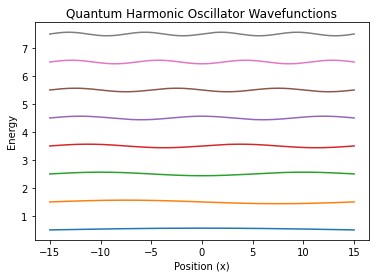

In [11]:
import numpy as np
import matplotlib.pyplot as plt

x_min = -15.0
x_max = 15.0
N = 500

# Create the grid
x = np.linspace(x_min, x_max, N)
dx = x[1] - x[0]

# Define the physical parameters
mass = 1.0
h_bar = 1.0
omega = 1.0

def qr_decomposition(matrix):
    Q, R = np.linalg.qr(matrix)
    return Q, R

def power_method(matrix, num_iterations, initial_guess, tolerance=1e-10):
    n = matrix.shape[0]

    # Step 1: Initialize a random vector
    v = initial_guess
    #v = np.random.rand(n)
    #v /= np.linalg.norm(v)

    for _ in range(num_iterations):
        # Step 2: Multiply the Hamiltonian by the current vector
        v_new = matrix.dot(v)

        # Step 3: Check for convergence
        eigenvalue = np.dot(v_new, v)
        #norm_v_new = np.linalg.norm(v_new)
        #if norm_v_new == 0:
        #    break

        #diff_norm = np.linalg.norm(v_new - eigenvalue * v) / norm_v_new
        #if diff_norm < tolerance:
        #    break
        #v = v_new/np.linalg.norm(v_new)
        #v = v_new / norm_v_new

    # Step 4: Normalize the final eigenvector
    v /= np.linalg.norm(v)

    # Step 5: Calculate the eigenvalue
    eigenvalue = np.dot(v, matrix.dot(v))

    return eigenvalue, v

def construct_hamiltonian(N, x, dx, h_bar, mass, omega):
    potential = 0.5 * mass * omega**2 * x**2
    potential = np.diag(potential)
    
    hamiltonian = np.zeros((N, N))
    
    finite_diff = -2 * np.eye(N)
    finite_diff += np.eye(N, k=1)
    finite_diff += np.eye(N, k=-1)
    
    kinetic = -h_bar**2 / (2 * mass * dx**2) * finite_diff
    
    hamiltonian = kinetic + potential*np.eye(N)
    print(hamiltonian)
    return hamiltonian





def eigensystem_solver(num_eigenvectors, num_iterations, mass, h_bar, hamiltonian, initial_guess):
    eigenvectors = np.zeros((N, num_eigenvectors))
    eigenvalues = np.zeros(num_eigenvectors)

    for i in range(num_eigenvectors):
        for _ in range(num_iterations):
            eigenvalue, eigenvector = power_method(hamiltonian, num_iterations, initial_guess[i])
            #eigenvector /= np.linalg.norm(eigenvector)

            # Check for convergence based on change in eigenvector
            if i > 0:
                change = np.linalg.norm(eigenvectors[:, i] - eigenvectors[:, i - 1])
                if change < 1e-6:
                    break

            eigenvalues[i] = eigenvalue
            eigenvectors[:, i] = eigenvector

            # Deflate the matrix using QR decomposition
            Q, R = qr_decomposition(hamiltonian)
            hamiltonian = np.dot(R, Q)

    # Normalize the eigenvectors
    eigenvectors /= np.linalg.norm(eigenvector)

    # Calculate quantum numbers (n) based on eigenvalues
    energy_levels = h_bar * omega * (np.arange(num_eigenvectors) + 0.5)

    return energy_levels, eigenvectors



num_eigenvectors = 8
num_iterations = 100

hamiltonian = construct_hamiltonian(N, x, dx, h_bar, mass, omega)

initial_guess = np.zeros((num_eigenvectors, N))
for i in range(num_eigenvectors):
    initial_guess[i, :] = np.sin(np.pi * (i + 1) * (x - x_min) / (x_max - x_min))

energy_levels, eigenvectors = eigensystem_solver(num_eigenvectors, num_iterations, mass, h_bar, hamiltonian, initial_guess)

# Plot the wavefunctions
for i in range(num_eigenvectors):
    plt.plot(x, eigenvectors[:, i] + energy_levels[i], label=f"n = {i}")

plt.xlabel('Position (x)')
plt.ylabel('Energy')
#plt.legend()
plt.title('Quantum Harmonic Oscillator Wavefunctions')
